In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-5-fface3c7c765>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-fface3c7c765>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

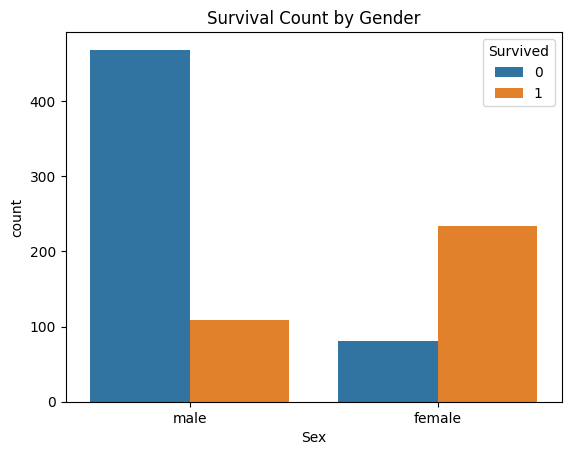

In [6]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

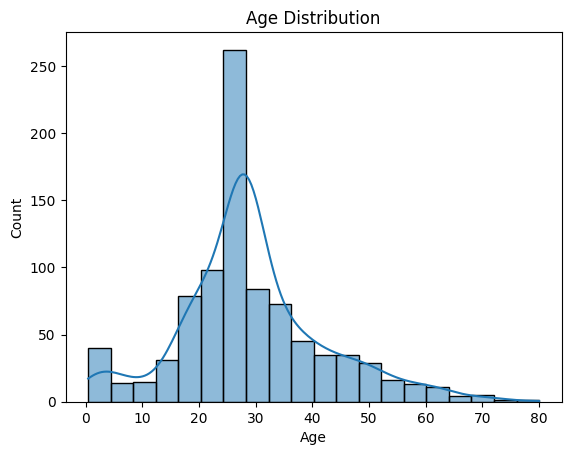

In [7]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

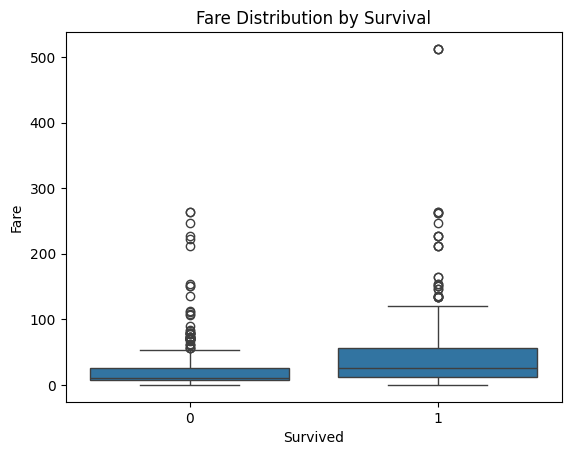

In [8]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

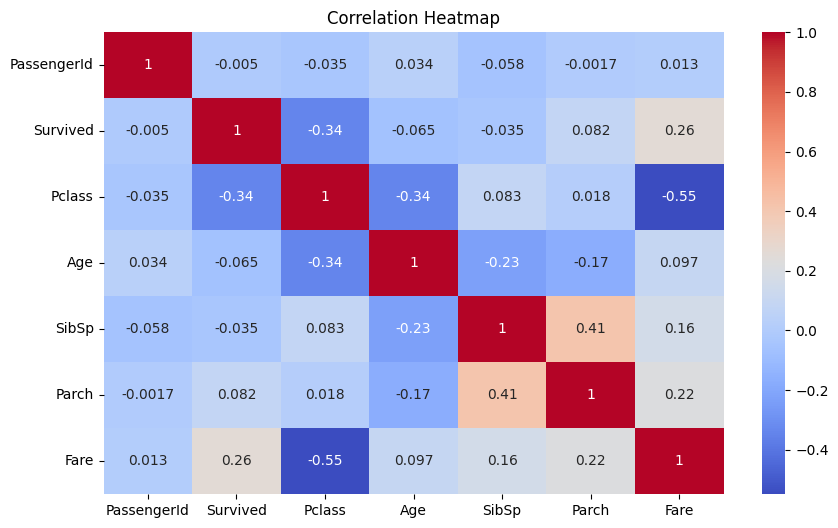

In [10]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


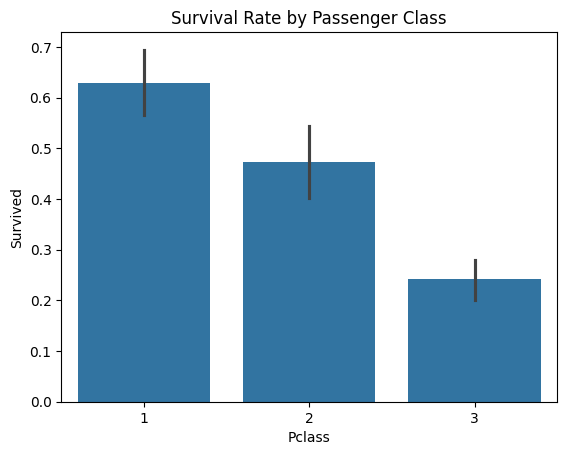

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

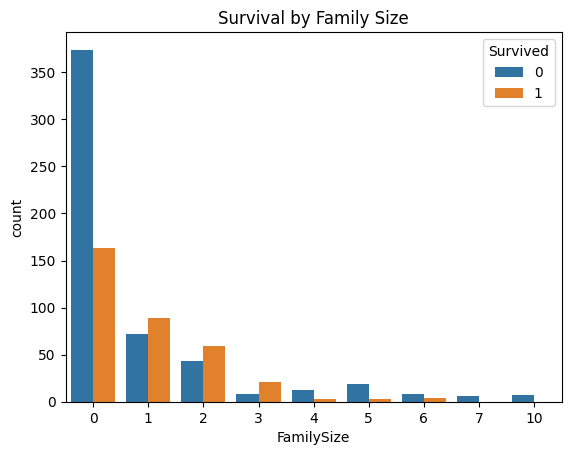

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

In [13]:
print("Key Insights:")
print("- Females had a higher survival rate than males.")
print("- 1st-class passengers were more likely to survive.")
print("- Children (Age < 10) had higher survival rates.")
print("- Higher fare-paying passengers survived more.")

Key Insights:
- Females had a higher survival rate than males.
- 1st-class passengers were more likely to survive.
- Children (Age < 10) had higher survival rates.
- Higher fare-paying passengers survived more.


In [14]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
fare_survival = df.groupby('FareBand')['Survived'].mean()
print(fare_survival)


FareBand
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


<ipython-input-14-2b928e929564>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareBand')['Survived'].mean()


In [15]:
print("🔹 Summary Statistics:")
print(df.describe())
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Survived Value Counts:")
print(df['Survived'].value_counts())
print("\n🔹 Pclass Value Counts:")
print(df['Pclass'].value_counts())
print("\n🔹 Sex Value Counts:")
print(df['Sex'].value_counts())
print("\n🔹 Embarked Value Counts:")
print(df['Embarked'].value_counts())


🔹 Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    1.0000

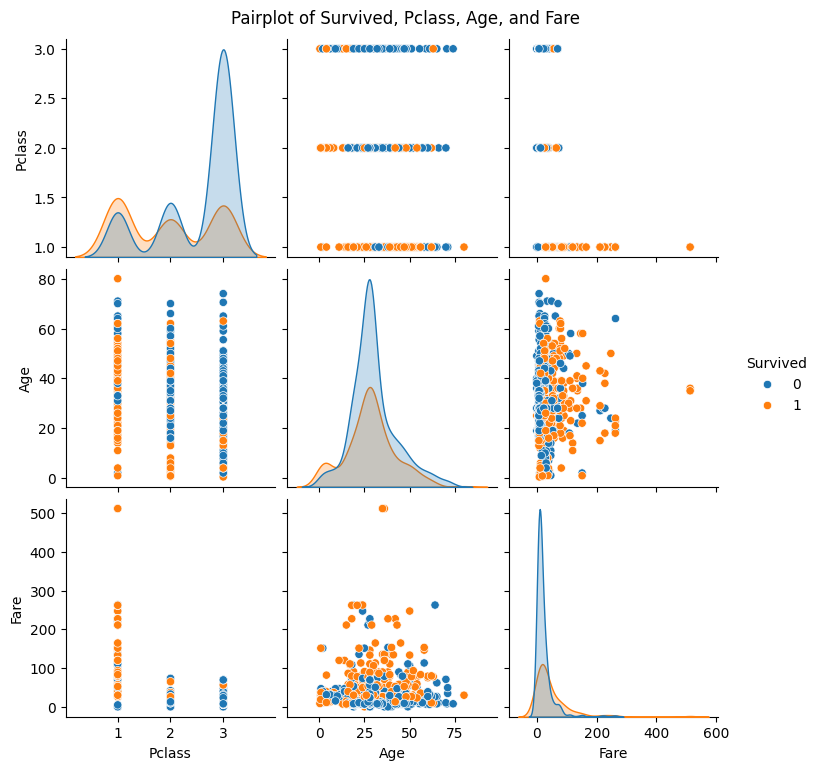

In [16]:
selected_cols = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(df[selected_cols], hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Survived, Pclass, Age, and Fare", y=1.02)
plt.show()


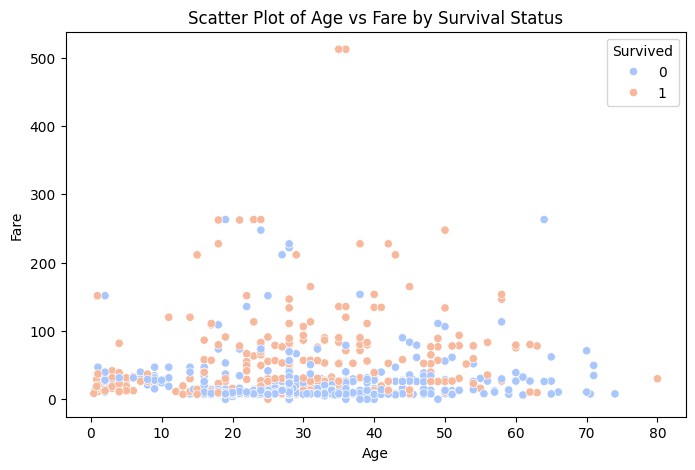

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()
